In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import re
from sklearn import metrics
import seaborn as sn
import lightgbm as lgb

In [3]:
train_set= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv') 
test_set= pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [4]:
df=pd.concat([train_set,test_set])

In [5]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
X=df.drop("label",axis=1)
y=df['label']

In [7]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Text(0, 0.5, 'count')

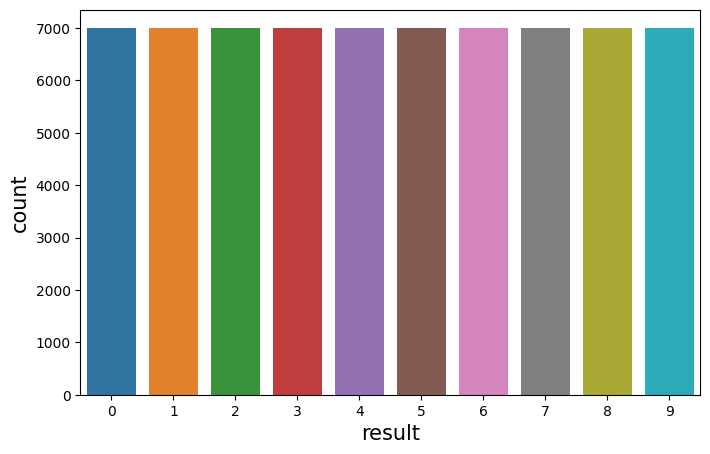

In [8]:
pot_lbl = y.value_counts()

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('result', fontsize=15)
plt.ylabel('count', fontsize=15)

In [9]:
X=X/255.0

In [10]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.019608,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.003922,0.007843,0.0,0.0,0.000000,0.000000,0.000000,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.145098,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.0,0.000000,0.0
9996,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.0,0.000000,0.0
9997,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.686275,0.674510,0.674510,0.713725,0.780392,0.870588,0.164706,0.0,0.003922,0.0
9998,0.0,0.003922,0.011765,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    print("Model:", model.__class__.__name__)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: LogisticRegression
Accuracy: 0.8561
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1415
           1       0.98      0.96      0.97      1365
           2       0.75      0.76      0.76      1399
           3       0.86      0.87      0.86      1462
           4       0.77      0.80      0.78      1430
           5       0.93      0.93      0.93      1319
           6       0.67      0.61      0.64      1410
           7       0.92      0.92      0.92      1441
           8       0.94      0.96      0.95      1378
           9       0.95      0.95      0.95      1381

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



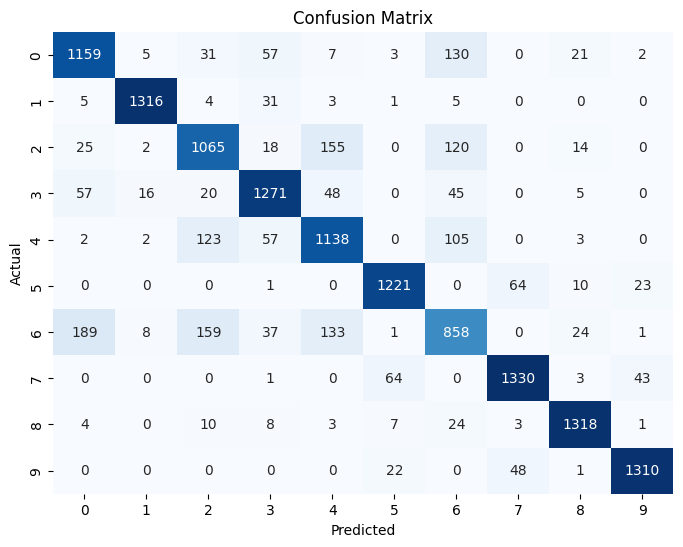

Model: KNeighborsClassifier
Accuracy: 0.8545
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1415
           1       0.99      0.97      0.98      1365
           2       0.73      0.81      0.77      1399
           3       0.89      0.87      0.88      1462
           4       0.79      0.76      0.78      1430
           5       0.99      0.82      0.90      1319
           6       0.67      0.58      0.62      1410
           7       0.88      0.95      0.91      1441
           8       0.98      0.96      0.97      1378
           9       0.90      0.97      0.93      1381

    accuracy                           0.85     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000



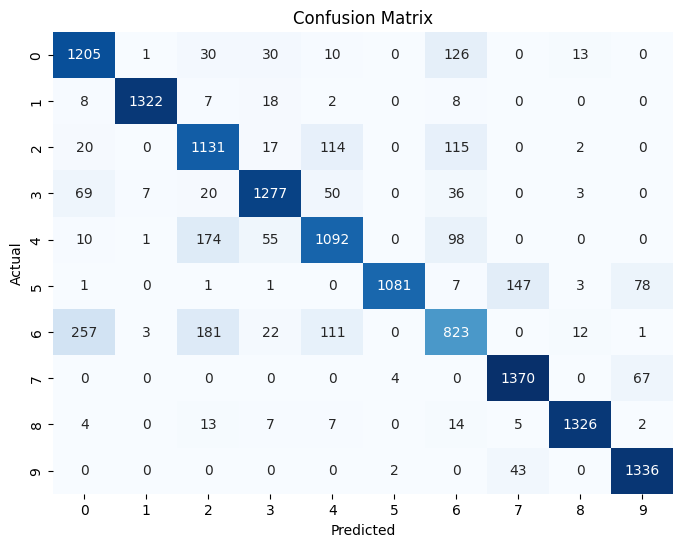

Model: RandomForestClassifier
Accuracy: 0.8839
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1415
           1       0.99      0.96      0.98      1365
           2       0.79      0.83      0.81      1399
           3       0.89      0.91      0.90      1462
           4       0.79      0.86      0.82      1430
           5       0.96      0.96      0.96      1319
           6       0.75      0.61      0.67      1410
           7       0.94      0.94      0.94      1441
           8       0.96      0.98      0.97      1378
           9       0.95      0.95      0.95      1381

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



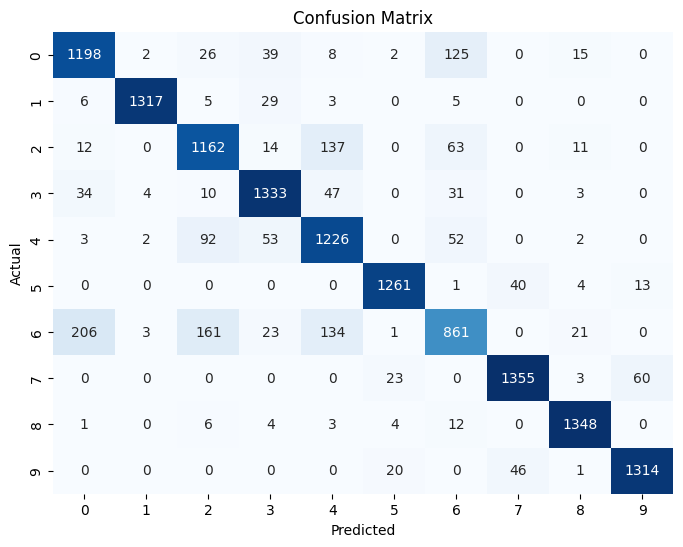

Model: DecisionTreeClassifier
Accuracy: 0.7944
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1415
           1       0.96      0.94      0.95      1365
           2       0.65      0.67      0.66      1399
           3       0.80      0.80      0.80      1462
           4       0.67      0.66      0.66      1430
           5       0.89      0.89      0.89      1319
           6       0.55      0.55      0.55      1410
           7       0.89      0.87      0.88      1441
           8       0.91      0.93      0.92      1378
           9       0.91      0.92      0.92      1381

    accuracy                           0.79     14000
   macro avg       0.80      0.80      0.80     14000
weighted avg       0.79      0.79      0.79     14000



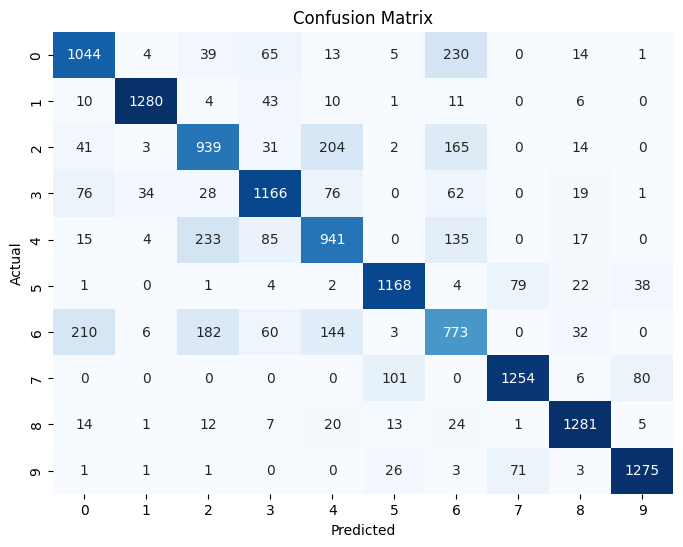

Model: XGBClassifier
Accuracy: 0.9015
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.84      1415
           1       0.99      0.98      0.99      1365
           2       0.83      0.85      0.84      1399
           3       0.90      0.91      0.90      1462
           4       0.83      0.87      0.85      1430
           5       0.98      0.97      0.97      1319
           6       0.75      0.68      0.71      1410
           7       0.96      0.97      0.96      1441
           8       0.97      0.98      0.98      1378
           9       0.97      0.97      0.97      1381

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



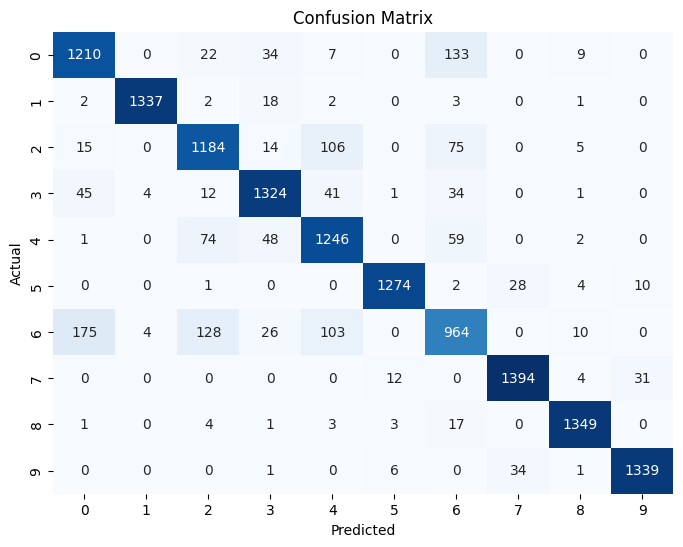

Model: LGBMClassifier
Accuracy: 0.8994
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1415
           1       0.99      0.98      0.99      1365
           2       0.83      0.84      0.84      1399
           3       0.90      0.91      0.90      1462
           4       0.82      0.87      0.84      1430
           5       0.98      0.97      0.97      1319
           6       0.74      0.68      0.71      1410
           7       0.95      0.97      0.96      1441
           8       0.97      0.98      0.98      1378
           9       0.97      0.96      0.97      1381

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



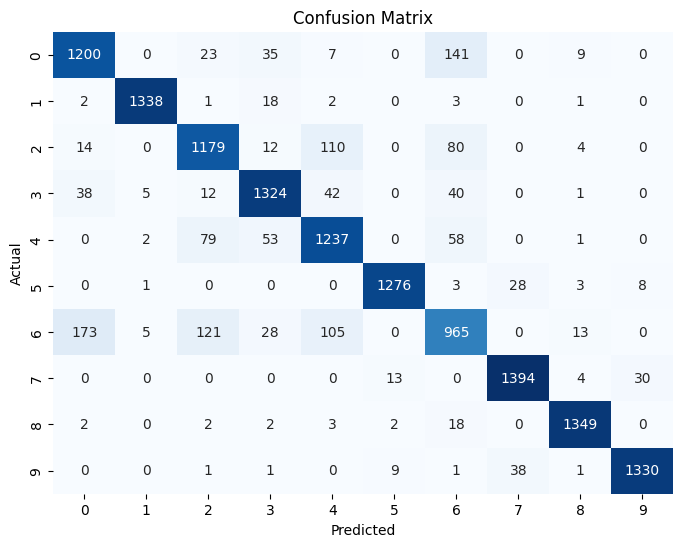

Model: HistGradientBoostingClassifier
Accuracy: 0.8997
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1415
           1       0.99      0.98      0.99      1365
           2       0.83      0.85      0.84      1399
           3       0.90      0.91      0.90      1462
           4       0.82      0.85      0.83      1430
           5       0.98      0.97      0.98      1319
           6       0.75      0.68      0.71      1410
           7       0.96      0.96      0.96      1441
           8       0.97      0.98      0.98      1378
           9       0.97      0.97      0.97      1381

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



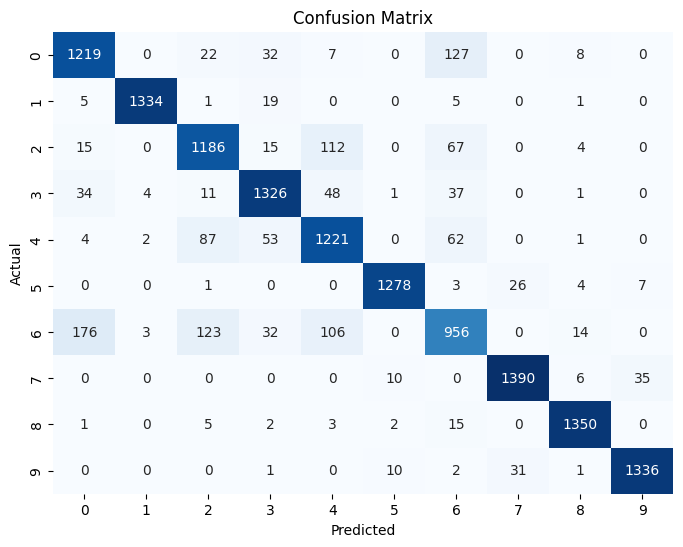

Model: ExtraTreesClassifier
Accuracy: 0.8831
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1415
           1       0.99      0.97      0.98      1365
           2       0.80      0.83      0.82      1399
           3       0.89      0.92      0.90      1462
           4       0.79      0.85      0.82      1430
           5       0.96      0.96      0.96      1319
           6       0.74      0.60      0.66      1410
           7       0.94      0.94      0.94      1441
           8       0.96      0.98      0.97      1378
           9       0.95      0.95      0.95      1381

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



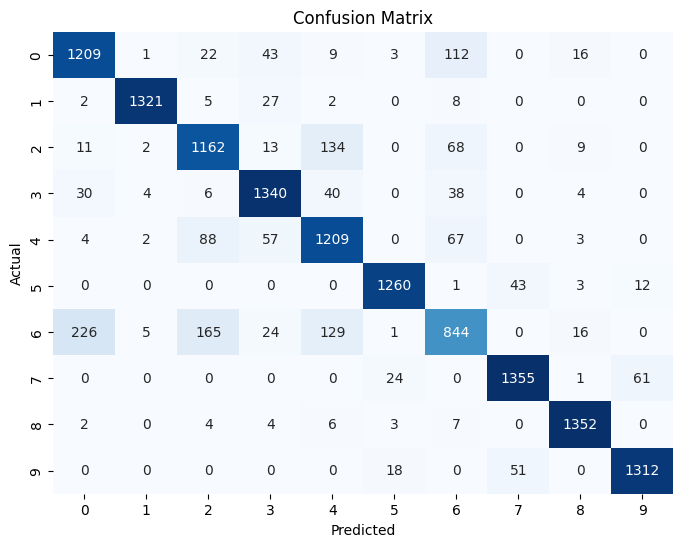

Model: MLPClassifier
Accuracy: 0.8731
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1415
           1       0.98      0.98      0.98      1365
           2       0.71      0.88      0.79      1399
           3       0.89      0.87      0.88      1462
           4       0.89      0.67      0.76      1430
           5       0.94      0.96      0.95      1319
           6       0.68      0.73      0.71      1410
           7       0.95      0.95      0.95      1441
           8       0.97      0.96      0.97      1378
           9       0.96      0.95      0.96      1381

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000



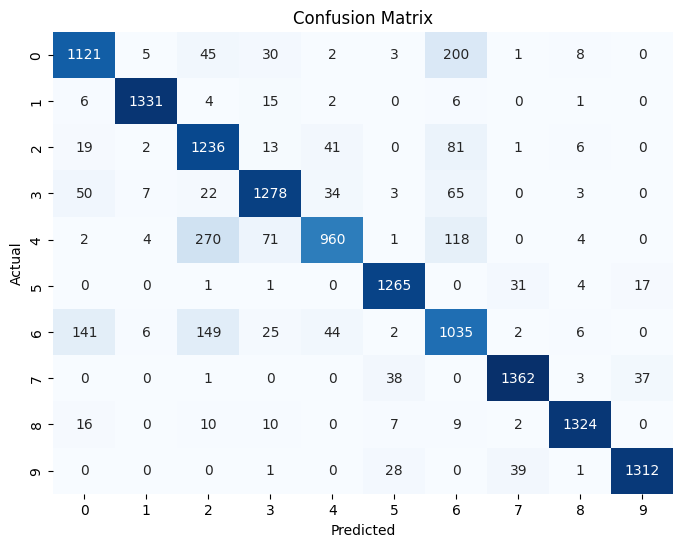

In [13]:
# Define a list of models to evaluate
models = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(), DecisionTreeClassifier(),xgb.XGBClassifier(),lgb.LGBMClassifier(),HistGradientBoostingClassifier(),ExtraTreesClassifier(),MLPClassifier()]

for model in models:
    train_and_evaluate_model(model,  X_train, y_train, X_test, y_test)

    

In [14]:

model_1 =xgb.XGBClassifier()
model_2 = HistGradientBoostingClassifier()


# importing voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss

final_model = VotingClassifier(estimators=[
                ('xgb', model_1), ('HGB', model_2)]
                ,voting= 'soft')
final_model.fit(X_train, y_train)

train=final_model.score(X_train,y_train)
pred = final_model.predict(X_test)

testing=accuracy_score(y_test, pred)
print("training acc: ",train)
print("testing acc: ",testing)



training acc:  0.9971428571428571
testing acc:  0.9035714285714286


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1415
           1       0.99      0.98      0.98      1365
           2       0.83      0.85      0.84      1399
           3       0.90      0.91      0.91      1462
           4       0.83      0.88      0.85      1430
           5       0.98      0.97      0.97      1319
           6       0.75      0.69      0.72      1410
           7       0.96      0.97      0.96      1441
           8       0.97      0.98      0.98      1378
           9       0.97      0.97      0.97      1381

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



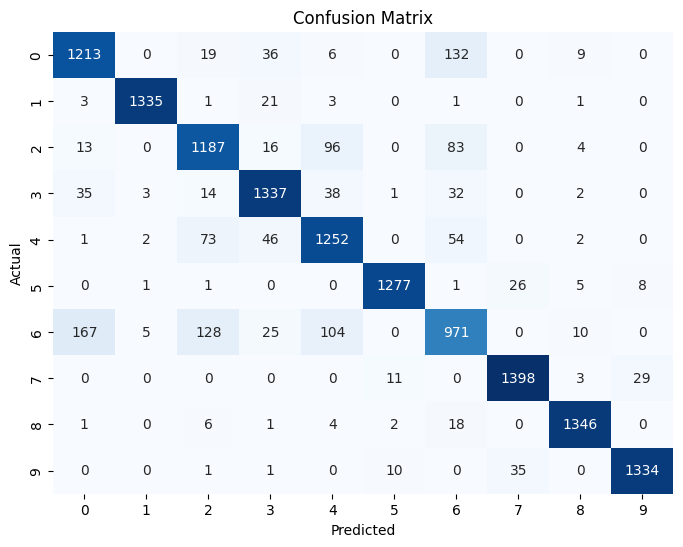

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
 
# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred))

    # Calculate and plot confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()